<a href="https://colab.research.google.com/github/Ivelina0/Dissertation_code/blob/main/Chapter_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Create synthetic data function

def generate_data(n, rnd_seed, mu, gamma, alpha ):

    # fixing the randomness
    np.random.seed(rnd_seed)
    
    Lambda_ = np.zeros(n+1)
    
    # First lambda(0) = mu
    Lambda_[0] = mu ## adding the first lambda_k = mu

    # Delta_n and lambda_n empty lists
    Delta_n = np.zeros(n) ## adding a dummy data point    
    
    #Generating the lambda function and synthetic data
    for i in range(0,n):

        # draw from poisson distribution
        Delta_n[i] = np.random.poisson(Lambda_[i], size=1)

        # update lambda k+1
        Lambda_[i+1] = gamma*(Lambda_[i] - mu) + mu + alpha*Delta_n[i]
    
    return Lambda_, Delta_n

# Fig 1: Step functions and bar plot

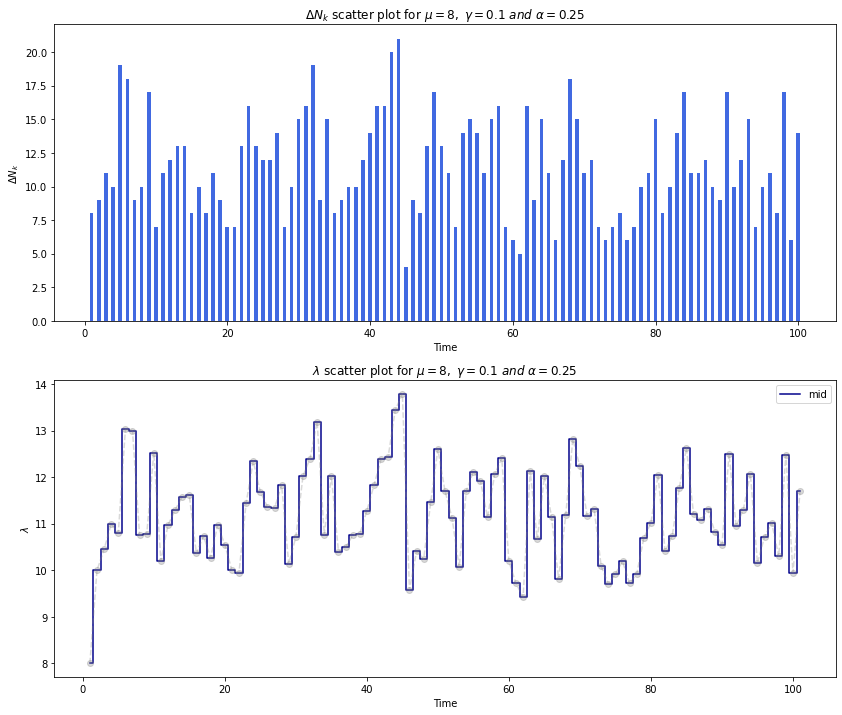

In [8]:
################################################################
# Creating fig. 3.2: the step function and bar plot
################################################################

# Setting the no. of data points
n0 = 100  
rnd_seed = 4 # random seed set

# Setting the parameters 
mu0 = 8
gamma0 = 0.1
alpha0 = 0.25

Lambda0_, Delta0_n = generate_data(n0, rnd_seed, mu0, gamma0, alpha0)

fig = plt.figure( figsize = (14,12))

# subplot 1
plt.subplot(211)

x1 = range(1,n0+1)

plt.bar(x1, Delta0_n[0:] ,  width=0.5,  color = 'royalblue')

plt.title(r'$\Delta N_k $ scatter plot for $ \mu = {} , \ \gamma = {} \ and \ \alpha = {}  $'.format(mu0,gamma0, alpha0))
plt.xlabel('Time')
plt.ylabel('$ \Delta N_k$')

# subplot 2
plt.subplot(212)

# Step function 
x2 = range(1,n0+2)

plt.step(x2, Lambda0_, color='darkblue', where='mid' , label = 'mid')  # label='pre (default)')
plt.plot(x2, Lambda0_, 'o--', color='grey', alpha=0.3)

plt.title(r'$\lambda $ scatter plot for $ \mu = {} , \ \gamma = {} \ and \ \alpha = {}  $'.format(mu0,gamma0, alpha0))
plt.xlabel('Time')
plt.legend()
plt.ylabel('$ \lambda$')

fig.savefig( "/content/gdrive/My Drive/Colab Notebooks/bar_step_plots_new.png" ,dpi=200,transparent=True);

# Extra plots - explorig the data - see appendix

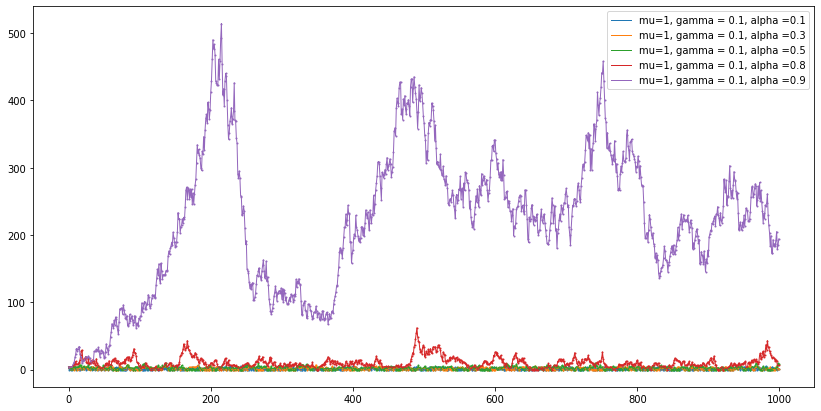

In [ ]:

#############################################################
## Plot 1: different alpha values, fixed gamma
#############################################################

# Plotting data for different values of alpha
n = 1000

Lambda1, Delta1 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.1)
Lambda2, Delta2 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.3)
Lambda3, Delta3 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.5)
Lambda4, Delta4 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.8)
Lambda5, Delta5 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.9)

# Looking at different values of alpha, fixed gamma

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.1")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.3")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.5")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.8")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.9")

plt.legend();

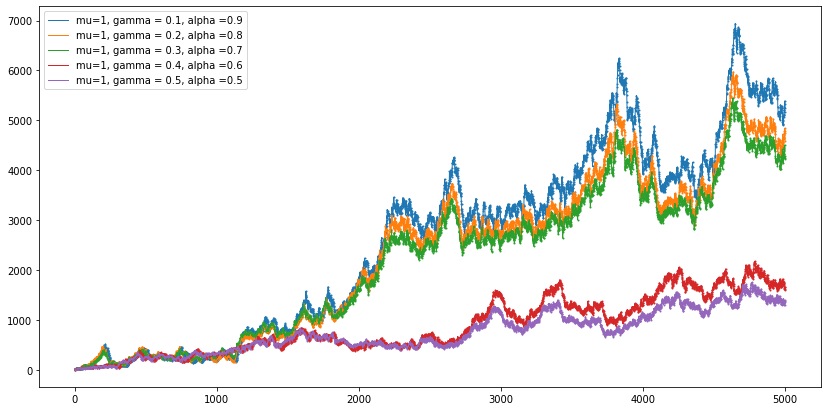

In [ ]:
#############################################################
## Plot 2: exploring an inverse relationship between alpha and gamma 
#############################################################

n=5000
Lambda1, Delta1 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.9)
Lambda2, Delta2 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.8)
Lambda3, Delta3 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.7)
Lambda4, Delta4 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.6)
Lambda5, Delta5 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.5)

# Looking at different values of alpha

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.9")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.8")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.7")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.6")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.5")

plt.legend();

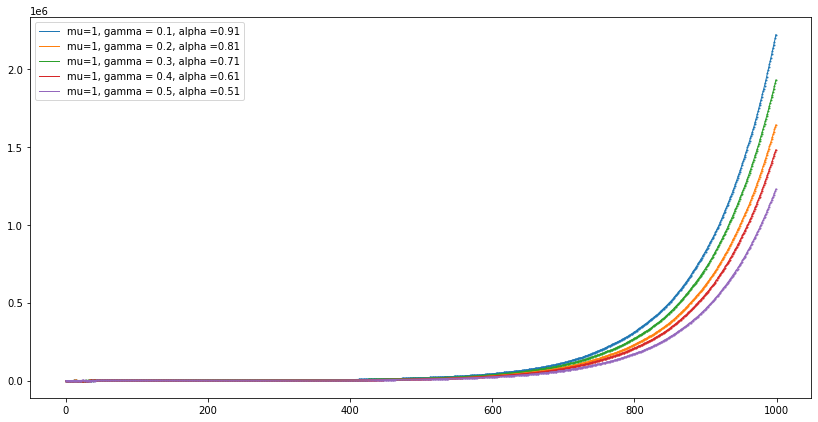

In [ ]:
#############################################################
## Plot 3: what if alpha and gamma do not add to 1?
#############################################################

# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.91)
Lambda2, Delta2 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.81)
Lambda3, Delta3 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.71)
Lambda4, Delta4 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.61)
Lambda5, Delta5 = generate_data(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.51) 
# lambda gets too large for values beyond 0.45

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.91")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.81")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.71")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.61")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.51")

plt.legend();

# Fig 2: 3D plot of parameters values with Negative log-likelihood hue

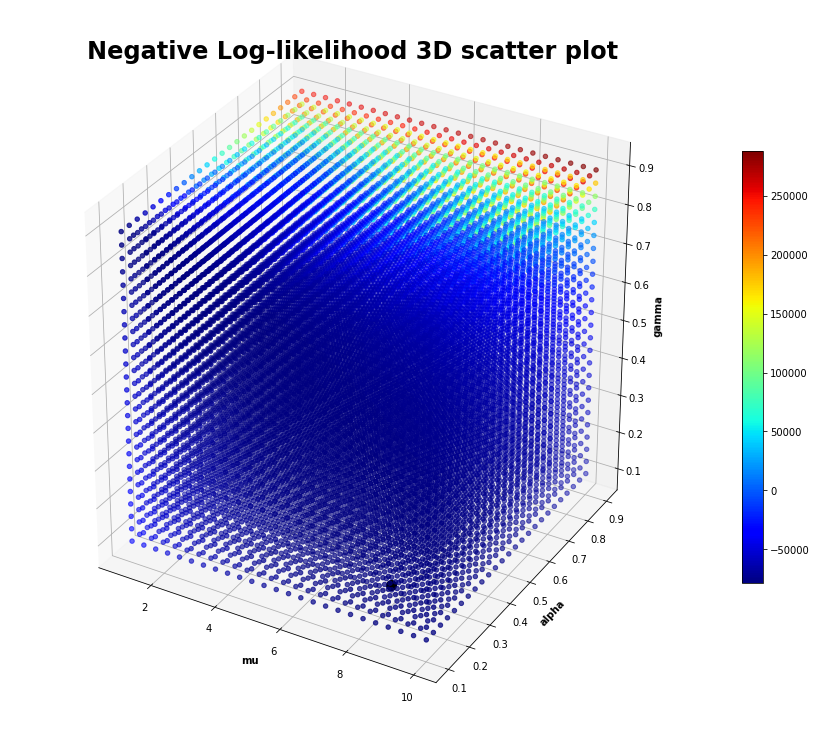

In [4]:

################################################################
## Negative Log-likelihood with 5,000 data points
################################################################

## Generating Data 
n = 5000  ## samples
rnd_seed = 4

# Set the parameters
mu0 = 8
gamma0 = 0.1
alpha0 = 0.25

Lambda_, data5000 = generate_data(n, rnd_seed, mu0, gamma0, alpha0)

## ------------------

## any number
mu = np.linspace(1, 10, 25)  
# infection rate larger than 0
alpha = np.linspace(0.1, 0.9, 25) 
# decay rate between 0 and 1
gamma = np.linspace(0.1, 0.9, 25)  

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

## ------------------

## making an array for the lambdas 

l = mm.copy()

## copying the meshgrid shape for lambda estimates
# 0 - array for lambda estimate
lambda_est = l - l 

## ------------------

n = len(data5000)

l_list = [mm]  ## list for the element wise multiplication
# of the data points with each lambda estimate

## the first multiplication of the negative 
# log-likelihood

for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data5000[i]
    
    l_list.append(lambda_est)
    
## ------------------

## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data5000[i], np.log(l_list[i]))
    
    ll_list.append(vals)
    
## ------------------

## finding the negative log-likelihood function 
## by summing all 10 x 10 x 10 arrays for each
## multiplication and summing all 10x10x10 arrays 
## of just lambdas  

neg_log_like =  -sum(ll_list) + sum(l_list)

################################################################
## Initial/ Full  plot
################################################################

## Plot not in the dissertation main 

fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0, alpha0, gamma0, c='black', s= 100)

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

#fig.savefig("3D_plot_initial_5000_data.png",transparent=True)

# Fig 3: 3D plot of the parameter values for the bottom 20% of the negative log-likelohood 

In [ ]:
# find the minimum value of the negative log likelihood 
Lmin = np.amin(neg_log_like)
Lmin 

4637.306889502609

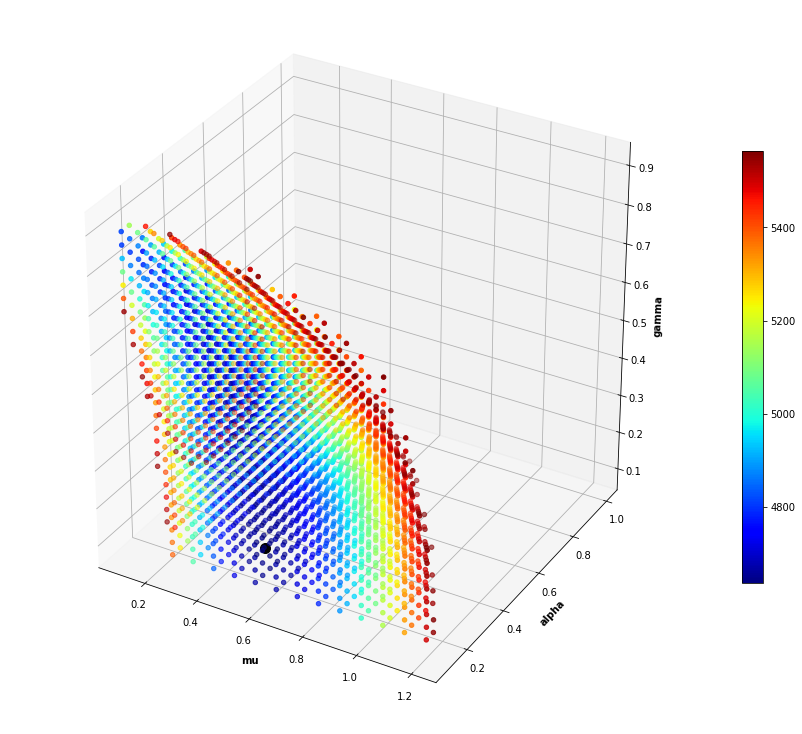

In [ ]:
################################################################
## Creating fig. 3.3a) 3D plot of the bottom 20% of the
# negative log-likelihood
################################################################

# create canvas 
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

# the 3D plot 
AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], 
    aa[neg_log_like < Lmin*1.2], 
    gg[neg_log_like < Lmin*1.2], 
    c = neg_log_like[neg_log_like < Lmin*1.2], 
    cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) 

# label axis
ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

# add colour bar 
plt.colorbar(AX, ax = ax, shrink = 0.6) 

# save png
# fig.savefig("3D_plot_bottom_5perc_5000_data.png", transparent=True)

# Additional 3D plot - rotated

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[Lmin*0.95 > neg_log_like], aa[Lmin*0.95 > neg_log_like], gg[Lmin*0.95 > neg_log_like], c = neg_log_like[Lmin*0.95 > neg_log_like], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
## plt.show()

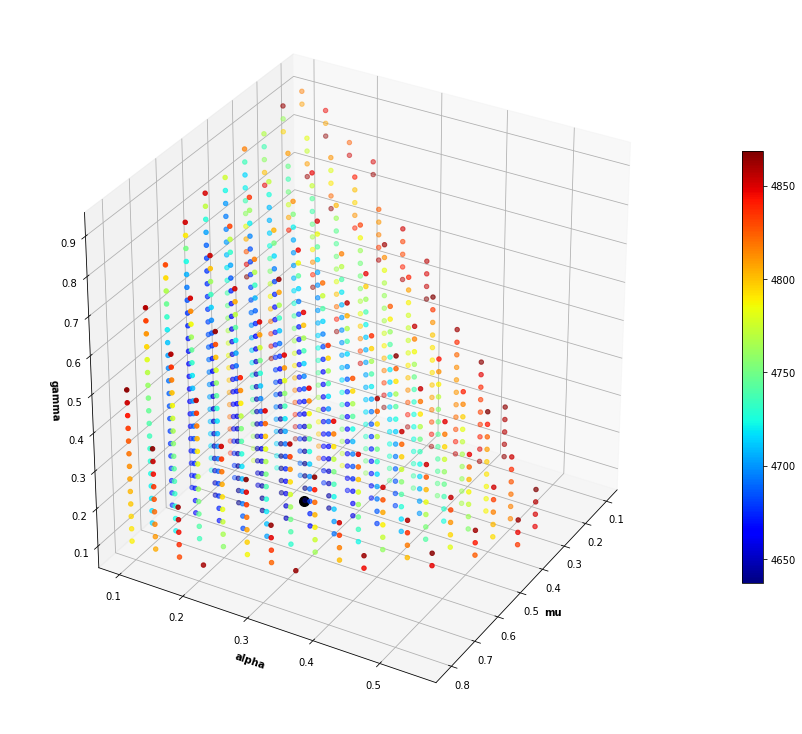

In [ ]:
################################################################
## Additional - rotated figure of 3D plot of the data for the
## bottom 20% of the negative log-likelihood 
################################################################

fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.05], 
    aa[neg_log_like < Lmin*1.05], 
    gg[neg_log_like < Lmin*1.05],
    c = neg_log_like[neg_log_like < Lmin*1.05], 
    cmap='jet')

# plot the actual parameter point on the figure
ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) 

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

# add colour bar 
plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45

# fig.savefig("3D_plot_bottom_5perc_rotated_5000_data.png", transparent=True)

# Fig. 4: Negative log-likelihood against error terms for 5000 data points

In [10]:
def find_lambda(data, mu_init, ga_init, al_init):

  n = len(data)

  lambda_list = np.ones(n+1)

  lambda_list[0] = mu_init

  for i in range(1,n+1):
      
      lambda_k_plus_1 = (lambda_list[i-1] - mu_init)*ga_init + mu_init + al_init*data[i-1]

      lambda_list[i] = lambda_k_plus_1

  lambda_list = lambda_list.reshape(n+1,1)
    
  return lambda_list

In [12]:
# create the true parameter in the same array shape as the mashgrid arrays
t = mm.copy()
true_par = t - t + 1

# multiplying & stacking them in the same way 
# mu0 = 0.5  gamma0 = 0.1  alpha0 = 0.25
True_stack = np.vstack((true_par*mu0, true_par*gamma0, true_par*alpha0))

## stack the meshgrid in the same vertical way
# mm, gg, aa 
Mesh_stack = np.vstack((mm, gg, aa))

# take the Eucl dist of the true - meshgrid values
diff = True_stack - Mesh_stack

# Placing the 3 parameter value differences into arrays of 3, for ease of use
par = []

for i in range(0,24):

  for j in range(0,24):

    for k in range(0,24):

      ## mm, gg, aa 

      three_parm_arr = np.hstack((diff[i][j][k], diff[i+25][j][k], diff[i+50][j][k]))

      par.append(three_parm_arr)

# Make the list into an array
diff_parameters = np.array(par)

# Taking the norm of the eroor terms vs true parameters 
euc_norm = np.linalg.norm(diff_parameters, axis=1)

# Similarly combining the meshgrid combinations of parameters 
# Mesh_stack - the ones used to estimate the true param

par_est = []

for i in range(0,24):

  for j in range(0,24):

    for k in range(0,24):

      ## mm, gg, aa 

      parm_arr_est = np.hstack((Mesh_stack[i][j][k], Mesh_stack[i+25][j][k], Mesh_stack[i+50][j][k]))

      par_est.append(parm_arr_est)

# Make the list into an array
est_param = np.array(par_est)

In [13]:
## lambda1 = mm  ## baseline

## finding the negative log-likelihood function

m = est_param.shape[0]

neg_log_likelihood = np.ones((m,1))

for i in range(m):

  lambda_list = find_lambda(data5000, mu_init = est_param[i][0], ga_init = est_param[i][1], al_init= est_param[i][2])

  mult_vals = np.multiply(data5000, np.log(lambda_list))

  neg_log_likelihood[i] =  -np.sum(mult_vals) + np.sum(lambda_list)

### -------------- 13-14mins to complete

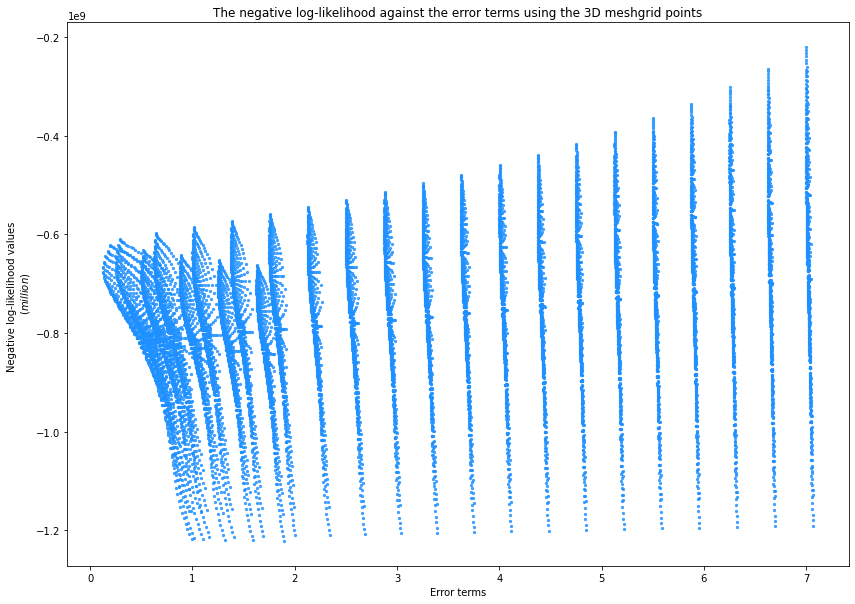

In [17]:
# plot chart
fig = plt.figure( figsize = (14,10))

# mu0 = 8, gamma0 = 0.1, alpha0 = 0.25

plt.scatter(euc_norm, neg_log_likelihood,c='dodgerblue', alpha=0.8, s=5)
plt.xlabel("Error terms" ) # \n for the true parameters $ \mu = 8$, $\gamma = 0.1 $ and $ \alpha = 0.25 $ ')
plt.ylabel("Negative log-likelihood values \n $(million)$")
plt.title("The negative log-likelihood against the error terms using the 3D meshgrid points")

fig.savefig("/content/gdrive/My Drive/Colab Notebooks/Error_chart_from_3D_plot.png");

# PCA using Sckit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [ ]:
################################################################
## PCA using ScikitLearn on the bottom 5% of the Neg. log. likelihood  
################################################################

mm_min = mm[neg_log_like < Lmin*1.05]
aa_min = aa[neg_log_like < Lmin*1.05]
gg_min = gg[neg_log_like < Lmin*1.05]

neg_log_like_min = neg_log_like[neg_log_like < Lmin*1.05]

# stack the parameter arrays next to each other
two = np.vstack((mm_min, aa_min))#, axis=1)
all_param = np.vstack((two, gg_min))# , axis=1)

# transpose the parameters
all_param_transp = all_param.T

# standarise the data
x = StandardScaler().fit_transform(all_param_transp)

# Initialize the PCA class by passing the number
# of components =3 to the constructor
# PCA() here is an object 
pca = PCA(n_components=3)

# fit the data to the object
principalComponents = pca.fit_transform(x)

# Variances
print('PCA Variances are ',pca.explained_variance_)

PCA Variances are  [1.41714506 1.28837098 0.29753584]


In [ ]:
# Make dataframe that contains PCs 
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=["mm_min","aa_min", "gg_min"])

# print the dataframe
components

,PC1,PC2,PC3
mm_min,-0.221427,0.809065,-0.544411
aa_min,-0.597432,-0.553783,-0.580000
gg_min,0.770743,-0.196821,-0.605984


Axis 1 has strong positive loading for gamma, and negative loading for mu and alpha. 

Axis 2 has strong positive loading for mu, and negative one for alpha and gamma. 

Axis 3 has all negative loadings with the minimum one being the one for gamma.

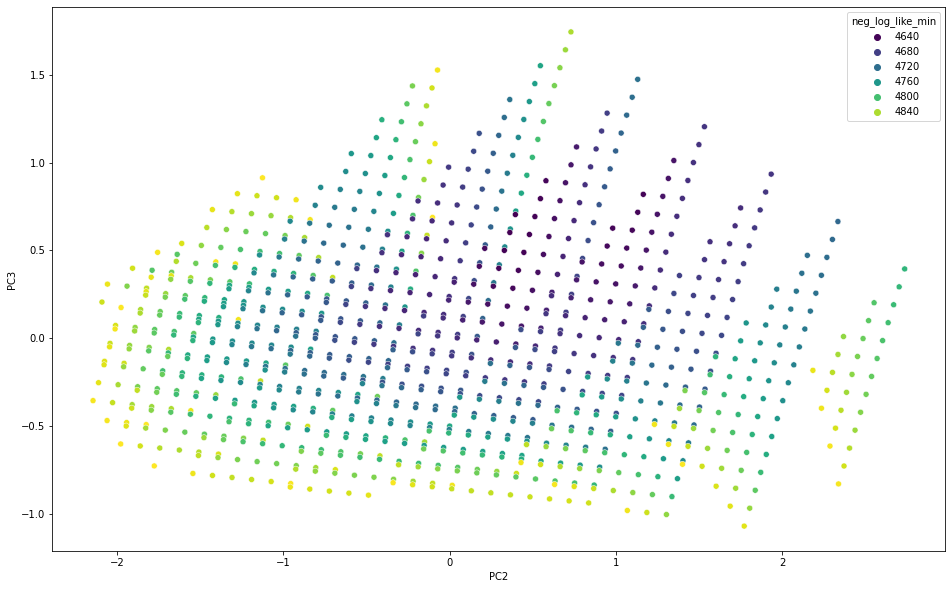

In [ ]:
##############################################
# Plot PCs against each other using the 
# seaborn's hue to find the optimal values 
##############################################

# make into a dataframe to use with the seaborn package 
# which is built using the matplotlib package

# make dataframes with principle components
princdf = pd.DataFrame(data = principalComponents,
        columns = ['PC1', 'PC2', 'PC3'])
        
# make a dataframe with the negative log-likelihood values
df_target = pd.DataFrame(data=neg_log_like_min,
        columns=["neg_log_like_min"])

# join the dataframes
finalDf = pd.concat([princdf, df_target], axis = 1)

# plot 1
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC2", y="PC3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc2_3.png",transparent=True);

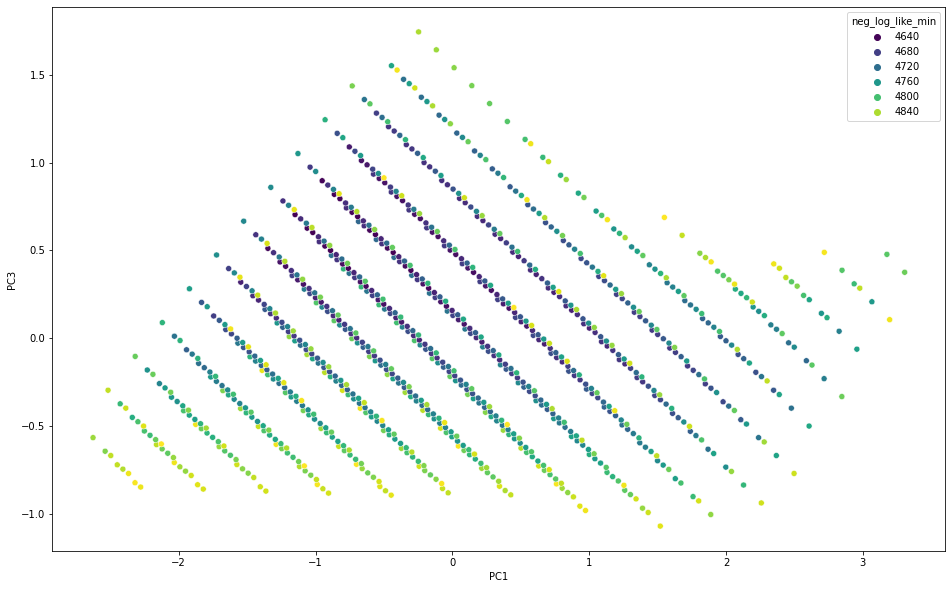

In [ ]:
# plot 2
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc1_3.png",transparent=True);


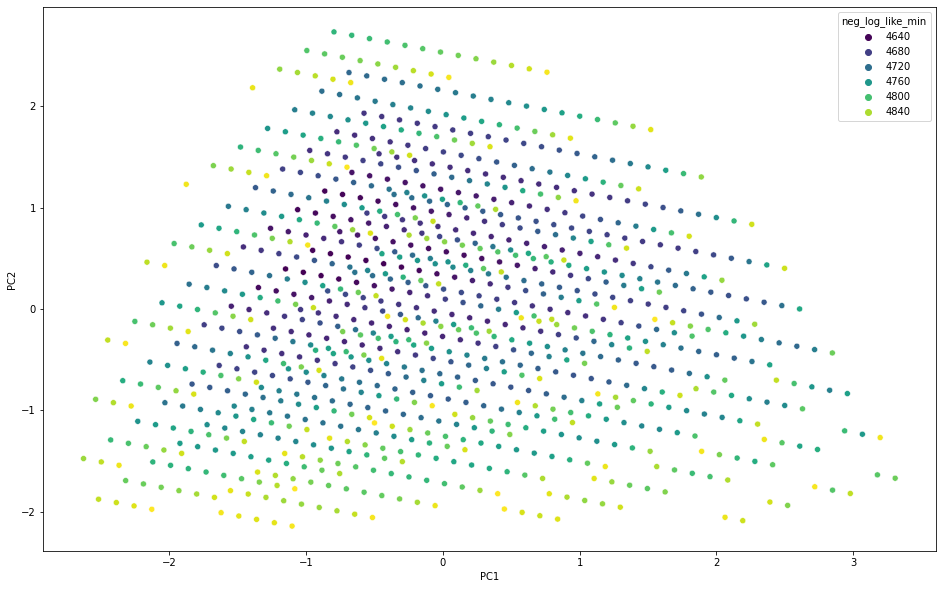

In [ ]:
# plot 3
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
)
# fig.savefig("PCA_components_pc1_2.png",transparent=True);

# PCA using NumPy

In [ ]:
################################################################
## PCA using NumPy on the bottom 5% of the Neg. log. likelihood  
################################################################

# Using the arrays from the Scikit-learn example:

# mm_min, aa_min, gg_min, neg_log_like_min 
# all_param

# find the number of valuess in the array
m = mm_min.shape[0] # 984
m

984

In [ ]:
# Standardise the whole matrix/array
means = np.mean(all_param, axis=1).reshape(3,1)
M = means*np.ones((3,m))
std = np.std(all_param, axis=1).reshape(3,1)

x = (all_param - M)/std

# PCA using NumPy
u, s, vh = np.linalg.svd(x, full_matrices=False)
u.shape, s.shape, vh.shape

((3, 3), (3,), (3, 984))

In [ ]:
# check the singular values
print(s)

[37.32363312 35.5874792  17.10198042]


In [ ]:
u

array([[-0.22142741, -0.80906495, -0.54441143],
       [-0.59743216,  0.55378277, -0.57999953],
       [ 0.77074296,  0.19682111, -0.60598411]])

In [ ]:
# print the dataframe from the Scikit-Learn example
components

,PC1,PC2,PC3
mm_min,-0.221427,0.809065,-0.544411
aa_min,-0.597432,-0.553783,-0.580000
gg_min,0.770743,-0.196821,-0.605984


In [ ]:
# the directions and weights are the same in both methods

## double checking the singular values by
# computing the e-values of the symmetric XX^t

C = np.dot(x, x.T)
eigen_vals, eigen_vecs = np.linalg.eig(C)

np.sqrt(eigen_vals)

# They are the same as the ones above

# The variances from Scikit-Learn are different to the ones from NumPy. 
# I will choose the NumPy variances to plot the Heatmap and Variance Barplot,
# since the manual eigenvalue calculation also agrees with the outcome. 

array([17.10198042, 35.5874792 , 37.32363312])

# Fig 5: PCA Heatmap

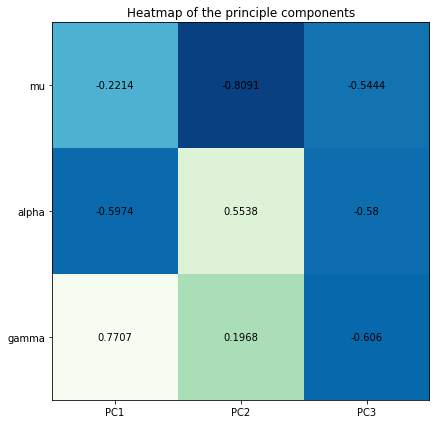

In [ ]:
## u is the data we want to plot

PC_labels = ["PC1", "PC2", "PC3"]

parm = ["mu", "alpha", "gamma" ]

fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(u, cmap='GnBu_r', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(PC_labels)))
ax.set_yticks(np.arange(len(parm)))

# ... and label them with the respective list entries
ax.set_xticklabels(PC_labels)
ax.set_yticklabels(parm);

# Loop over data dimensions and create text annotations.
for i in range(len(PC_labels)):
    for j in range(len(parm)):
        text = ax.text(j, i, np.round(u[i, j],4),
                       ha="center", va="center", color="black")
        
        
ax.set_title("Heatmap of the principle components")
fig.tight_layout()

# fig.savefig("HeatmapPCA.png",transparent=True);

# Fig 6: Singular values bar plot

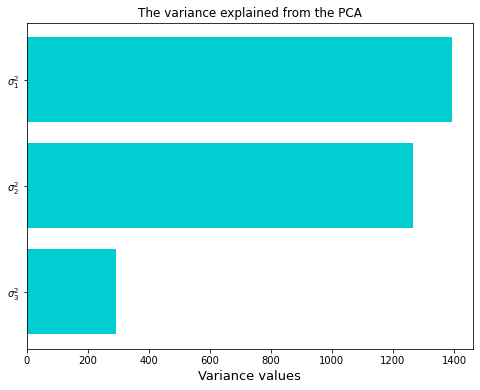

In [ ]:
# Get the variance from the singular values
variance = np.square(s)

# create plot
fig, ax = plt.subplots(figsize=(8,6))

# the labels using Latex
labs = ["$\sigma_1^2$", "$\sigma_2^2$", "$\sigma_3^2$"]

# barplot 
ax.barh(labs, variance, color = "darkturquoise")

ax.invert_yaxis()
ax.set_xlabel("Variance values", fontsize= 13)
plt.title("The variance explained from the PCA");

#fig.savefig("BarplotPCA.png",transparent=True);

# Fig 7: ODE Expecation as time goes to infinity

In [ ]:
# import packages
from scipy.integrate import odeint

# function that returns dy/dt
def model(y,t):
    mu_ode = mu0
    gamma_ode = gamma0
    alpha_ode = alpha0

    dydt = mu_ode*(1-gamma_ode)  + (gamma_ode+ alpha_ode -1) * y
    return dydt

# initial condition y0 = E{t=0} = mu
y0 = mu0 ##+ alpha0*mu0

############################################
# Create a range of parameters to test the ODE
############################################

mu = np.linspace(0.5, 3.0, num=5)
gamma = np.linspace(0.01, 0.1, num=5)
alpha = np.linspace(0.5,0.8, num=5)

y_arr = np.zeros((5,50))

# time points
t = np.linspace(0,100)

for i in range(5):
  
  mu0 = mu[i]
  gamma0 = gamma[i]
  alpha0 = alpha[i]

  # solve ODE
  y = odeint(model,y0,t)

  y = y.reshape(1,50)

  # add to array
  y_arr[i] = y

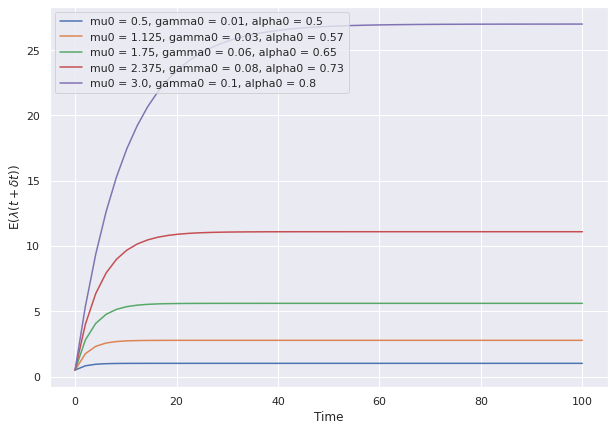

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize=(10,7))

for i in range(5):

  # plot results
  plt.plot(t,y_arr[i], label="mu0 = {}, gamma0 = {}, alpha0 = {}".format(mu[i], np.round(gamma[i],2),np.round(alpha[i],2) ))
  plt.xlabel('Time')
  plt.ylabel('E($\lambda(t+\delta t)$)')
  plt.legend()

# fig.savefig( "/content/gdrive/My Drive/Colab Notebooks/Expec_plots.png" ,dpi=200,transparent=True)

In [ ]:
# checking the ODE makes sense by manually calculating the 
# value of lambda_k as t goes to infinity

# estimate - when mu = 0.5, gamma = 0.01, alpha = 0.5
est = (0.5*(1-0.01))/(1-0.01-0.5)

# the ODE calculation - the last value of the ODE
actual = y_arr[0][-1]

print("Multiplication estimate: ", np.round(est,4))
print("ODE calculation", np.round(actual,4))

Multiplication estimate:  1.0102
ODE calculation 1.0102


# Fig 8: ODE Variance, as time goes to infinity

In [ ]:
# function that returns dV/dt
def model_var(V,t):
    mu_ode = mu0
    gamma_ode = gamma0
    alpha_ode = alpha0

    dVdt = 2*(gamma_ode+ alpha_ode - 1) * V + alpha_ode**2 * y_arr[0][-1]
    return dVdt

# initial condition y0 = E{t=0} = mu
# y0 = mu0 ##+ alpha0*mu0

mu = np.linspace(0.5, 3.0, num=5)
gamma = np.linspace(0.01, 0.1, num=5)
alpha = np.linspace(0.5,0.8, num=5)

V0 = 0

V_arr = np.zeros((5,50))

# time points
t = np.linspace(0,100)

for i in range(5):
  
  mu0 = mu[i]
  gamma0 = gamma[i]
  alpha0 = alpha[i]

  # solve ODE
  y = odeint(model,y0,t)
  y = y.reshape(1,50)
  # add to array
  y_arr[i] = y

  # solve ODE
  V = odeint(model_var,V0,t)
  V = V.reshape(1,50)
  # add to array
  V_arr[i] = V

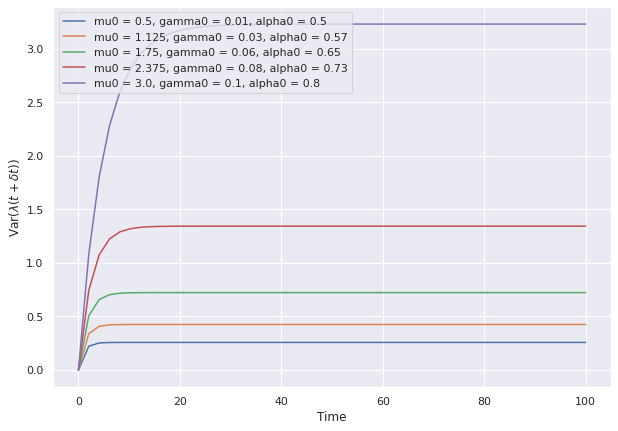

In [ ]:
# Plot the ODE Variance
fig, ax = plt.subplots(figsize=(10,7))

for i in range(5):

  # plot results
  plt.plot(t,V_arr[i], label="mu0 = {}, gamma0 = {}, alpha0 = {}".format(mu[i], np.round(gamma[i],2),np.round(alpha[i],2) ))
  plt.xlabel('Time')
  plt.ylabel('Var($\lambda(t+\delta t)$)')
  plt.legend()

# fig.savefig( "/content/gdrive/My Drive/Colab Notebooks/Var_plot.png" ,dpi=200,transparent=True)

In [ ]:
# check variance for mu = 0.5, gamma = 0.01 alpha = 0.5

( 0.5*(1-0.01)*0.5**2 )/(2* (0.5 - 1 + 0.01)**2 )

0.25770512286547276

In [ ]:
actual = V_arr[0][-1]
actual

0.25770512287758374

# Update rules for mu, gamma and alpha

**Note the data must not have zero values otherwise the update function do not work.**

In [ ]:
# import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

## Generating Data 
# mu = 8 gamma = 0.1 alpha = 0.25

n = 5000  ## samples
rnd_seed = 4
mu0 = 8
gamma0 = 0.01
alpha0 = 0.25

# Generate data
Lambda_, data5000 = generate_data(n, rnd_seed, mu0, gamma0, alpha0)

data5000.shape ## (1000,)

#reshape the data array
data5000 = data5000.reshape(n,1)
data5000.shape # (1000, 1)

(5000, 1)

In [ ]:
# check if it has any null values 
null_val = np.where(data5000 == 0)
null_val 

(array([], dtype=int64), array([], dtype=int64))

In [9]:
## the first multipication of the negative log-likelihood

def find_lambda(data, mu_init, ga_init, al_init):

  n = len(data)

  lambda_list = np.ones(n+1)

  lambda_list[0] = mu_init

  for i in range(1,n+1):
      
      lambda_k_plus_1 = (lambda_list[i-1] - mu_init)*ga_init + mu_init + al_init*data[i-1]

      lambda_list[i] = lambda_k_plus_1

  lambda_list = lambda_list.reshape(n+1,1)
    
  return lambda_list

In [ ]:
# testing the function gives 1001 lambda values
lambda_list = find_lambda(data5000, mu0, gamma0, alpha0)
print(lambda_list)

[[8.000000]
 [10.000000]
 [10.270000]
 ...
 [11.267778]
 [11.282678]
 [11.782827]]


## $\mu$ update loop & function

We set * $ \phi^n_{kl} = \alpha \gamma^{k-l-1} \Delta N_l  $

---

$ \mu^{n+1} = \frac{1}{N} \sum^N_{k=1} \frac{ \mu^n }{\lambda_k^n} \Delta N_k $

In [ ]:
##### Mu update

def find_mu(data, mu_, lambda_list):

  n = len(data)

  mu_update = (1/n)*np.sum(np.divide(mu_*data , lambda_list[:-1, :] ))
    
  return mu_update

## $\alpha$ update rule

We set * $ \phi^n_{kl} = \alpha \gamma^{k-l-1} \Delta N_l  $

---

Let 

* $ A = \frac{ 1+\gamma^n }{\alpha^n}(\sum^{N-2}_{i=1} \Delta N_i ) $
* $ B = \Delta N_{N-1}  $
* $ C =  \sum^{N}_{k=1} \sum^{k-1}_{l=1} \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

$ \alpha^{n+1} = \frac{ -B + \sqrt{B^2 + 4AC} }{2A} $

In [ ]:
def find_alpha(data, alpha_, gamma_, lambda_list):

  n = len(data)

  # starts from k=2 to k = N, so we need N-1 balues 
  A = np.zeros((n-1, 1))

  # create constants - need to start from second value k=2 (index is 1 )
  C = (data/lambda_list[:-1, :])

  # add initial value
  A[0] =  data[0]*C[1]

  for j in range(1, n-1):

    A[j] = (gamma_*(A[j-1]/C[j]) +  data[j])*C[j+1]

  D = np.sum(A*alpha_)

  # A = sum of the first N-2 data points * (1+gamma)/alpha
  A = (1 + gamma_)*np.sum(data[:-2, :])/alpha_

  B = data[-1,:]

  alpha_update = ( -B + np.sqrt(B**2 + 4*A*D) )/ (2*A)
    
  return alpha_update

## $\gamma$ update trial loops


We set * $ \phi^n_{kl} = \alpha \gamma^{k-l-1} \Delta N_l  $

---

Let 

* $ B =  \frac{\alpha^n (\sum^{N-2}_{i=1} \Delta N_i ) }{ (1+\gamma^n )} $ 

* $ A = - \sum^{N}_{k=1} \sum^{k-1}_{l=1} (k-l-1) \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

So 

$ \gamma^{n+1} =  \frac{-B + \sqrt{B^2 + 4AB}}{2B}$




In [ ]:
def find_gamma(data, alpha_, gamma_, lambda_list):

  n = len(data)

  # starts from k=3 to k = N, so we need N-2 values 
  K = np.zeros((n-2, 1))

  # create constants - need to start from second value k=3 (index is 2 )
  G = (data/lambda_list[:-1, :])

  # add initial two values
  K[0] =  gamma_*data[0]*G[2]
  K[1] = ((K[0]/G[2])*2*gamma_ + gamma_*data[1])*G[3]

  # for loop the rest N-2-2 values
  for l in range(2, n-2):

    # K[2]  =((K[1]/G[3])*2*ga_init - (K[0]/G[2])*(ga_init**2) + ga_init*data1000[2])*G[4]

    K[l]  =((K[l-1]/G[l+1])*2*gamma_ - (K[l-2]/G[l])*(gamma_**2) + gamma_*data[l])*G[l+2]

  F = - np.sum(K*alpha_)

  # this one is both a and c in the quadratic eqn
  P = (alpha_/ (gamma_ + 1))* np.sum(data[:-2,:])

  gamma_update = (-P + np.sqrt(P**2 - 4*F*P))/(2*P) 
    
  return gamma_update

# Testing the update rules

In [ ]:
# The actual parameter values
# mu0 = 8, gamma0 = 0.01, alpha0 = 0.25

# initial guesses
mu_init = 10
ga_init = 0.001
al_init = 0.4

n = len(data5000)

iter = 100

mu_arr = np.zeros(iter)
mu_arr[0] = mu_init

alpha_arr = np.zeros(iter)
alpha_arr[0] = al_init

gamma_arr = np.zeros(iter)
gamma_arr[0] = ga_init

for i in range(1,iter):
  
  # initialising the values & updating them for the loop
  mu_val = mu_arr[i-1]
  al_val = alpha_arr[i-1]
  ga_val = gamma_arr[i-1]

  # finding the lambda estimates with the parameter values 
  lambda_list = find_lambda(data5000, mu_val, ga_val, al_val)

  mu_arr[i] = find_mu(data5000, mu_val, lambda_list)

  alpha_arr[i] = find_alpha(data5000, al_val, ga_val, lambda_list)

  gamma_arr[i] = find_gamma(data5000, al_val, ga_val, lambda_list)

In [ ]:
mu_arr, alpha_arr, gamma_arr

(array([10.000000, 7.489715, 7.172884, 7.133559, 7.138085, 7.149616,
        7.162125, 7.174624, 7.186955, 7.199096, 7.211046, 7.222808,
        7.234386, 7.245783, 7.257003, 7.268049, 7.278924, 7.289632,
        7.300176, 7.310560, 7.320785, 7.330855, 7.340773, 7.350542,
        7.360165, 7.369643, 7.378981, 7.388180, 7.397242, 7.406172,
        7.414970, 7.423639, 7.432181, 7.440600, 7.448896, 7.457072,
        7.465131, 7.473074, 7.480903, 7.488620, 7.496227, 7.503727,
        7.511120, 7.518409, 7.525596, 7.532682, 7.539668, 7.546558,
        7.553351, 7.560051, 7.566657, 7.573173, 7.579599, 7.585937,
        7.592189, 7.598355, 7.604437, 7.610437, 7.616355, 7.622194,
        7.627954, 7.633637, 7.639244, 7.644775, 7.650233, 7.655619,
        7.660933, 7.666177, 7.671351, 7.676458, 7.681497, 7.686470,
        7.691378, 7.696222, 7.701004, 7.705723, 7.710380, 7.714978,
        7.719516, 7.723996, 7.728418, 7.732784, 7.737093, 7.741348,
        7.745548, 7.749695, 7.753790, 7.757832,

In [ ]:
print("Estimates after 100 iterations: ", np.round(mu_arr[-1],4), np.round(alpha_arr[-1],4), np.round(gamma_arr[-1],4))
print("Real values: ",mu0, alpha0, gamma0)

Estimates after 100 iterations:  7.8026 0.2689 0.0008
Real values:  8 0.25 0.01


# Function to find all parameters

In [ ]:
####### FIND ALL PARAMETERS function 

def find_param(itr, mu0, ga0, al0, data):

  n = len(data)

  iter = itr

  mu_arr = np.zeros(iter)
  mu_arr[0] = mu0

  alpha_arr = np.zeros(iter)
  alpha_arr[0] = al0

  gamma_arr = np.zeros(iter)
  gamma_arr[0] = ga0

  for i in range(1,iter):
    
    # initialising the values & updating them for the loop
    mu_val = mu_arr[i-1]
    al_val = alpha_arr[i-1]
    ga_val = gamma_arr[i-1]

    # finding the lambda estimates with the parameter values 
    lambda_list = find_lambda(data, mu_val, ga_val, al_val)

    mu_arr[i] = find_mu(data, mu_val, lambda_list)

    alpha_arr[i] = find_alpha(data, al_val, ga_val, lambda_list)

    gamma_arr[i] = find_gamma(data, al_val, ga_val, lambda_list)

  return mu_arr, alpha_arr, gamma_arr

In [ ]:
# Testing it 
# initial guesses
mu_init = 10
ga_init = 0.001
al_init = 0.4
itr = 100

mu_updates, alpha_updates, gamma_updates = find_param(itr, mu_init, ga_init, al_init, data5000)
mu_updates, alpha_updates, gamma_updates

(array([10.000000, 7.489715, 7.172884, 7.133559, 7.138085, 7.149616,
        7.162125, 7.174624, 7.186955, 7.199096, 7.211046, 7.222808,
        7.234386, 7.245783, 7.257003, 7.268049, 7.278924, 7.289632,
        7.300176, 7.310560, 7.320785, 7.330855, 7.340773, 7.350542,
        7.360165, 7.369643, 7.378981, 7.388180, 7.397242, 7.406172,
        7.414970, 7.423639, 7.432181, 7.440600, 7.448896, 7.457072,
        7.465131, 7.473074, 7.480903, 7.488620, 7.496227, 7.503727,
        7.511120, 7.518409, 7.525596, 7.532682, 7.539668, 7.546558,
        7.553351, 7.560051, 7.566657, 7.573173, 7.579599, 7.585937,
        7.592189, 7.598355, 7.604437, 7.610437, 7.616355, 7.622194,
        7.627954, 7.633637, 7.639244, 7.644775, 7.650233, 7.655619,
        7.660933, 7.666177, 7.671351, 7.676458, 7.681497, 7.686470,
        7.691378, 7.696222, 7.701004, 7.705723, 7.710380, 7.714978,
        7.719516, 7.723996, 7.728418, 7.732784, 7.737093, 7.741348,
        7.745548, 7.749695, 7.753790, 7.757832,

In [ ]:
print("Function est after 100 iterations: ", np.round(mu_updates[-1],4), np.round(alpha_updates[-1],4), np.round(gamma_updates[-1],4))
print("Estimates after 100 iterations: ", np.round(mu_arr[-1],4), np.round(alpha_arr[-1],4), np.round(gamma_arr[-1],4))
print("Real values: ",mu0, alpha0, gamma0)

Function est after 100 iterations:  7.8026 0.2689 0.0008
Estimates after 100 iterations:  7.8026 0.2689 0.0008
Real values:  8 0.25 0.01


# Function to find all parameters and the negative log-likelihood 

In [ ]:
####### FIND ALL PARAMETERS function 

def find_param(itr, mu0, ga0, al0, data):

  n = len(data)

  iter = itr

  neg_log_likelihood = np.zeros((iter,1))

  mu_arr = np.zeros(iter)
  mu_arr[0] = mu0

  alpha_arr = np.zeros(iter)
  alpha_arr[0] = al0

  gamma_arr = np.zeros(iter)
  gamma_arr[0] = ga0

  for i in range(1,iter):
    
    # initialising the values & updating them for the loop
    mu_val = mu_arr[i-1]
    al_val = alpha_arr[i-1]
    ga_val = gamma_arr[i-1]

    # finding the lambda estimates with the parameter values 
    lambda_list = find_lambda(data, mu_val, ga_val, al_val)

    mu_arr[i] = find_mu(data, mu_val, lambda_list)

    alpha_arr[i] = find_alpha(data, al_val, ga_val, lambda_list)

    gamma_arr[i] = find_gamma(data, al_val, ga_val, lambda_list)
    
    mult_vals = np.multiply(data, np.log(lambda_list[:-1, :]))
    
    neg_log_likelihood[i] = -np.sum(mult_vals) + np.sum(lambda_list)

  return mu_arr, alpha_arr, gamma_arr, neg_log_likelihood

In [ ]:
# Testing it 
# initial guesses
mu_init = 10
ga_init = 0.001
al_init = 0.4
itr = 100

mu_new, alpha_new, gamma_new, neg_log_likelihoods = find_param(itr, mu_init, ga_init, al_init, data5000)
mu_new, alpha_new, gamma_new, neg_log_likelihoods

(array([10.000000, 7.489715, 7.172884, 7.133559, 7.138085, 7.149616,
        7.162125, 7.174624, 7.186955, 7.199096, 7.211046, 7.222808,
        7.234386, 7.245783, 7.257003, 7.268049, 7.278924, 7.289632,
        7.300176, 7.310560, 7.320785, 7.330855, 7.340773, 7.350542,
        7.360165, 7.369643, 7.378981, 7.388180, 7.397242, 7.406172,
        7.414970, 7.423639, 7.432181, 7.440600, 7.448896, 7.457072,
        7.465131, 7.473074, 7.480903, 7.488620, 7.496227, 7.503727,
        7.511120, 7.518409, 7.525596, 7.532682, 7.539668, 7.546558,
        7.553351, 7.560051, 7.566657, 7.573173, 7.579599, 7.585937,
        7.592189, 7.598355, 7.604437, 7.610437, 7.616355, 7.622194,
        7.627954, 7.633637, 7.639244, 7.644775, 7.650233, 7.655619,
        7.660933, 7.666177, 7.671351, 7.676458, 7.681497, 7.686470,
        7.691378, 7.696222, 7.701004, 7.705723, 7.710380, 7.714978,
        7.719516, 7.723996, 7.728418, 7.732784, 7.737093, 7.741348,
        7.745548, 7.749695, 7.753790, 7.757832,

In [ ]:
# What are the last parameters after 100 iterations
print("Estimates after 100 iterations: ", np.round(mu_new[-1],4), np.round(alpha_new[-1],4), np.round(gamma_new[-1],4))
print("Real values: ",mu0, alpha0, gamma0)

Estimates after 100 iterations:  7.8026 0.2689 0.0008
Real values:  8 0.25 0.01


In [ ]:
# mu_new, alpha_new, gamma_new, neg_log_likelihoods

# reshape the arrays with the parameter iterates
gamma_arr = gamma_new.reshape(-1,1)
mu_arr = mu_new.reshape(-1,1)
alpha_arr = alpha_new.reshape(-1,1)

# create one array containing all parameter iterates
all_param_iter = np.concatenate((mu_arr, gamma_arr, alpha_arr), axis=1)
all_param_iter[-5:]

# It is stable

array([[7.788392, 0.000842, 0.270238],
       [7.792000, 0.000844, 0.269895],
       [7.795563, 0.000846, 0.269557],
       [7.799082, 0.000847, 0.269223],
       [7.802558, 0.000849, 0.268893]])

In [ ]:
############################################################
####### Find the parameter errors at each iterations 
############################################################

# true parameters array of the same size as the parameter iterates arrays
# mu = 8 gamma = 0.01 alpha = 0.25
x = np.array([8, 0.01, 0.25])

# Making the array containing the true parameters of the same size as the one above 
true_param = np.ones((all_param_iter.shape[0],3))*x
true_param.shape

# Taking the difference betweeen the true and estimated parameters
diff = true_param - all_param_iter

euc_norm = np.linalg.norm(diff, axis=1)
euc_norm.shape

(100,)

# Fig 9: Negative log-likelihood values against the parameters' error terms 

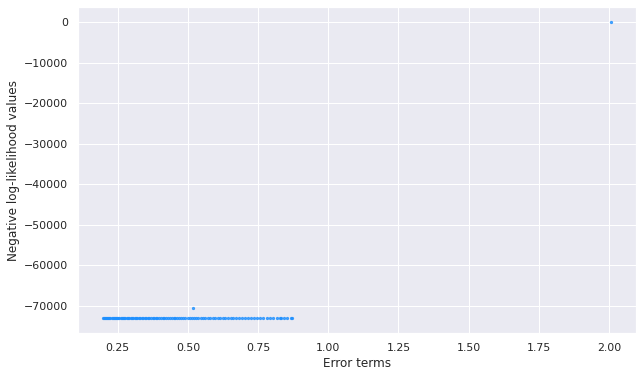

In [ ]:
# plot chart
fig = plt.figure( figsize = (10,6))

plt.scatter(euc_norm, neg_log_likelihoods, c='dodgerblue', alpha=0.8, s=5)
plt.xlabel("Error terms" ) # \n for the true parameters $ \mu = 8$, $\gamma = 0.1 $ and $ \alpha = 0.25 $ ')
plt.ylabel("Negative log-likelihood values")

fig.savefig("/content/gdrive/My Drive/Colab Notebooks/Error_chart_initial_all_iterations.png", dpi=200,transparent=True);

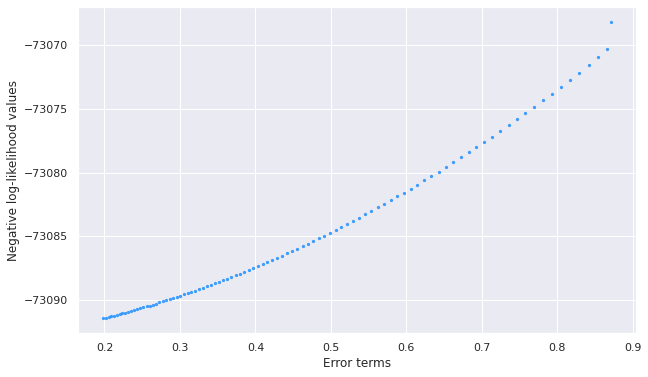

In [ ]:
# Get rid of the initial guess and first two iterations 
# because they have quite large negative log-likelihoods.

fig = plt.figure( figsize = (10,6))

plt.scatter(euc_norm[3:], neg_log_likelihoods[3:], c='dodgerblue', alpha=0.8, s=5)
plt.xlabel("Error terms" ) # \n for the true parameters $ \mu = 8$, $\gamma = 0.1 $ and $ \alpha = 0.25 $ ')
plt.ylabel("Negative log-likelihood values")

fig.savefig("/content/gdrive/My Drive/Colab Notebooks/Error_chart_after_two_iter.png", dpi=200,transparent=True);

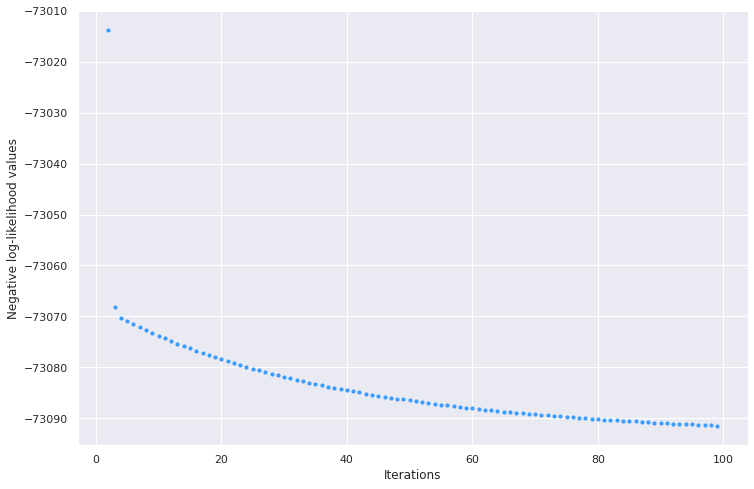

In [ ]:
# Exclude the negative log-likelihood for the initial parameters and first iteration.

# Setting the x-axis to be the number of iterations
x = np.arange(neg_log_likelihoods.shape[0])

fig = plt.figure( figsize = (12,8))

plt.scatter(x[2:], neg_log_likelihoods[2:], c='dodgerblue', alpha=0.8, s=10)
plt.xlabel("Iterations" ) # \n for the true parameters $ \mu = 8$, $\gamma = 0.1 $ and $ \alpha = 0.25 $ ')
plt.ylabel("Negative log-likelihood values")

fig.savefig("/content/gdrive/My Drive/Colab Notebooks/Negative_log-likelihood_iter_with_initial_guess.png", dpi=200,transparent=True);

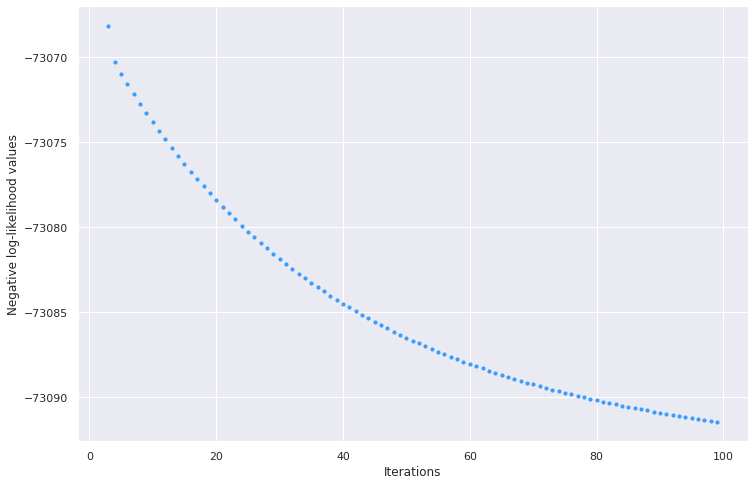

In [ ]:
# Exclude the negative log-likelihood for the first two parameter iterations
# because they have quite large negative log-likelihood values.

# x-axis is the number of iterations
x = np.arange(neg_log_likelihoods.shape[0])

fig = plt.figure( figsize = (12,8))

plt.scatter(x[3:], neg_log_likelihoods[3:], c='dodgerblue', alpha=0.8, s=10)
plt.xlabel("Iterations" ) # \n for the true parameters $ \mu = 8$, $\gamma = 0.1 $ and $ \alpha = 0.25 $ ')
plt.ylabel("Negative log-likelihood values")

fig.savefig("/content/gdrive/My Drive/Colab Notebooks/Negative_log_likelihood_iter_after_two_iter.png", dpi=200,transparent=True);

In [ ]:
# Finding the difference between the largest and smallest negative log-likelihood value after 100 iterations

np.max(neg_log_likelihoods) - np.min(neg_log_likelihoods)

73091.44422049071